In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import nltk 
from nltk.collocations import *
from nltk.metrics import (
    ContingencyMeasures,
    BigramAssocMeasures
)
from nltk.util import ngrams
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re 
import os
import sys
import matplotlib.pyplot as plt
import folium as fm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

bigram_measures = nltk.collocations.BigramAssocMeasures()
%matplotlib inline

path1 = r'C:\Users\pltzi\Desktop\data mining\data\april'
path2 = r'C:\Users\pltzi\Desktop\data mining\data\febrouary'
path3 = r'C:\Users\pltzi\Desktop\data mining\data\march'
df1=pd.read_csv(path1+"\\"+"listings.csv",usecols=[
'id',
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bed_type',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights'
])
df2=pd.read_csv(path2+"\\"+"listings.csv",usecols=[
'id',
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bed_type',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights'
])
df3=pd.read_csv(path3+"\\"+"listings.csv",usecols=[
'id',
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bed_type',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights'
])
df1['month'] = 'April'
df1['month'].fillna('April', inplace = True)

df2['month'] = 'February'
df2['month'].fillna('February', inplace = True)

df3['month'] = 'March'
df3['month'].fillna('March', inplace = True)

df = df1.append(df2)
df = df.append(df3)
df.drop_duplicates(inplace=True)
df=df.dropna(axis=0, how="any")
df.to_csv('train.csv', index=False, header=True)

new_df=df.copy()
new_df.drop_duplicates(inplace=True,subset="id")

In [2]:
#Question 1.1

Entire home/apt: 4932


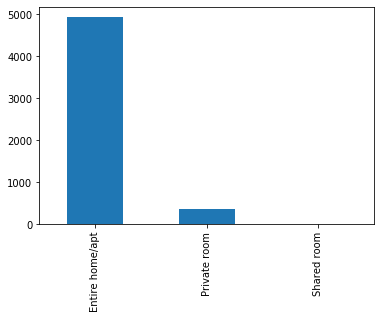

In [3]:
rtypes = new_df['room_type'].value_counts().index[0]
most_rtype=new_df['room_type'].value_counts().max()
print(rtypes+": %d" % most_rtype)
new_df['room_type'].value_counts().plot.bar();

In [4]:
#Question 1.2

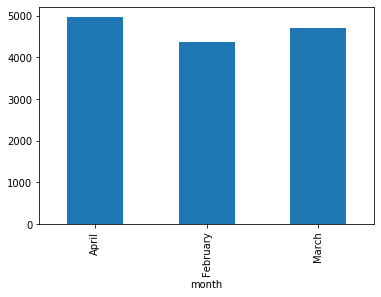

In [5]:
df.groupby('month')['price'].count().plot.bar();

In [6]:
#Question 1.3

1) Plaka : 972
2) Koukaki : 745
3) Neos Kosmos : 613
4) Kolonaki : 476
5) Pangrati : 384


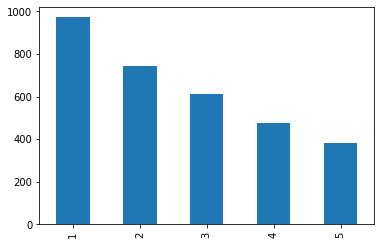

In [7]:
df.sort_values('number_of_reviews',inplace = True,ascending=False)
n_list=df['neighbourhood'].value_counts()[:5].index.tolist()
review_num=df['number_of_reviews'].value_counts()[:5].tolist()
for i in range(1,6):
    print("%d)"%i,n_list[i-1],": %d"%review_num[i-1])


df['number_of_reviews'].value_counts()[:5].plot.bar();    
    

In [8]:
#Question 1.4

Plaka: 660


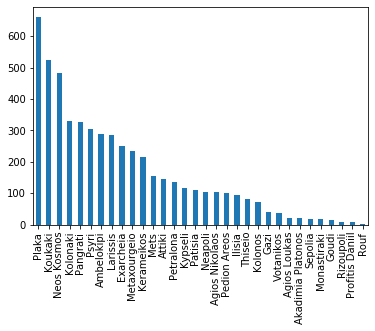

In [9]:
hood = new_df['neighbourhood'].value_counts().index[0]
num_hood=new_df['neighbourhood'].value_counts().max()
print(hood+": %d" % num_hood)
new_df['neighbourhood'].value_counts().plot.bar()

In [10]:
#Question 1.5

Registrations per neighbourhood

Plaka                660
Koukaki              523
Neos Kosmos          482
Kolonaki             330
Pangrati             328
Psyri                306
Ambelokipi           289
Larissis             284
Exarcheia            250
Metaxourgeio         236
Kerameikos           215
Mets                 154
Attiki               146
Petralona            135
Kypseli              115
Patisia              109
Neapoli              105
Agios Nikolaos       103
Pedion Areos         100
Ilisia                95
Thiseio               81
Kolonos               73
Gazi                  40
Votanikos             37
Agios Loukas          22
Akadimia Platonos     20
Sepolia               19
Monastiraki           19
Goudi                 13
Rizoupoli              9
Profitis Daniil        7
Rouf                   2
Name: neighbourhood, dtype: int64


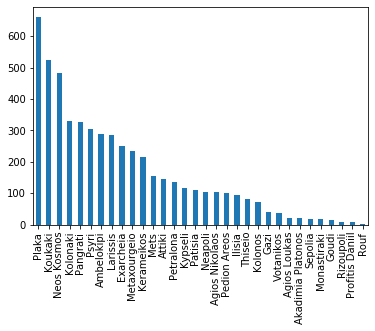

In [11]:
perhood= new_df['neighbourhood'].value_counts()
print("Registrations per neighbourhood\n")
print(perhood)
perhood.plot.bar()



Registrations per month

April       4968
February     315
March         24
Name: month, dtype: int64


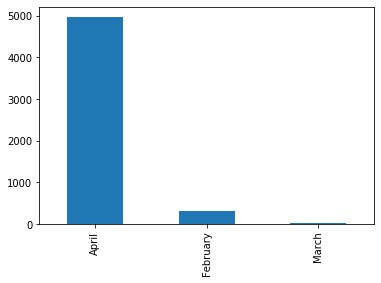

In [12]:
permonth=new_df['month'].value_counts()
print("\n\nRegistrations per month\n")
print(permonth)
permonth.plot.bar()

In [13]:
#Question 1.6

<BarContainer object of 32 artists>

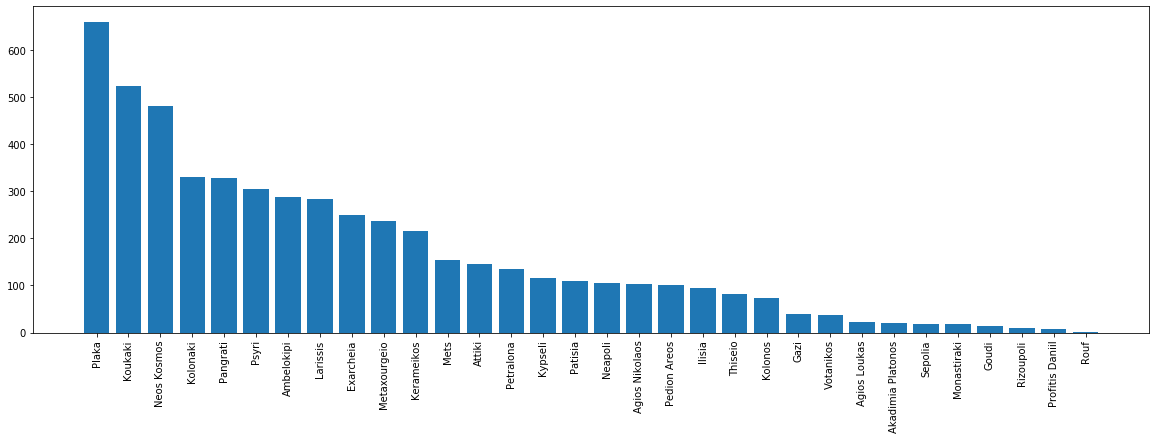

In [14]:
hoods=[]
frequency=[]
for i,j in perhood.items():
  hoods.append(i)
  frequency.append(j)
plt.figure(figsize=(20,6))
y_pos = range(len(hoods))
plt.xticks(y_pos,hoods, rotation=90)
plt.bar(hoods, frequency)

#i hope you didn't just need a plt.hist(perhoods) histogram...

In [15]:
#In case you actually wanted that just uncomment the line below
#plt.hist(perhood)

In [16]:
#Question 1.7

In [17]:
new_df.groupby(['neighbourhood'])['room_type'].agg(pd.Series.mode)

neighbourhood
Agios Loukas         Entire home/apt
Agios Nikolaos       Entire home/apt
Akadimia Platonos    Entire home/apt
Ambelokipi           Entire home/apt
Attiki               Entire home/apt
Exarcheia            Entire home/apt
Gazi                 Entire home/apt
Goudi                Entire home/apt
Ilisia               Entire home/apt
Kerameikos           Entire home/apt
Kolonaki             Entire home/apt
Kolonos              Entire home/apt
Koukaki              Entire home/apt
Kypseli              Entire home/apt
Larissis             Entire home/apt
Metaxourgeio         Entire home/apt
Mets                 Entire home/apt
Monastiraki          Entire home/apt
Neapoli              Entire home/apt
Neos Kosmos          Entire home/apt
Pangrati             Entire home/apt
Patisia              Entire home/apt
Pedion Areos         Entire home/apt
Petralona            Entire home/apt
Plaka                Entire home/apt
Profitis Daniil      Entire home/apt
Psyri                Ent

In [18]:
#Question 1.8

In [19]:
print("The most expensive room type is:\n")
df['price']=df['price'].str.replace('$','') #remove str if you rerun the cell
df['price']=df['price'].str.replace(',','') #remove str if you rerun the cell
df['price']=df['price'].astype(float)
avg = df.groupby('room_type')['price'].mean()
print(avg.index[0]+ ": %f" % avg.max())

The most expensive room type is:

Entire home/apt: 57.560700


In [20]:
#Question 1.9

In [21]:
avg_lat = df1['latitude'].mean()
avg_long = df1['longitude'].mean()
map = fm.Map(location = [avg_lat,avg_long],zoom_start = 11)
for la,lo,pp in zip(df1['latitude'][0:100], df1['longitude'][0:100], df1['room_type']):
    fm.Marker(
        location=[la,lo],
        popup=pp,
        icon=fm.Icon(icon_color='white')
).add_to(map)
display(map)


In [22]:
#Question 1.10

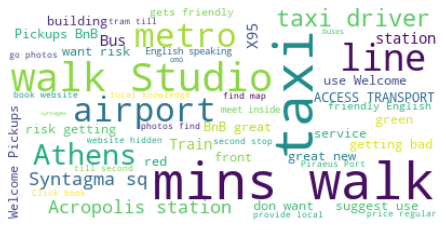

In [23]:
text = df['transit'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

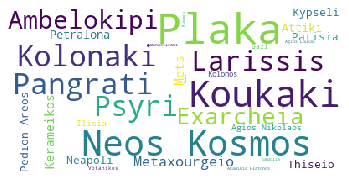

In [24]:
#create word cloud for neighbourhood
comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df['neighbourhood']: 

    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 

    for words in tokens: 
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(max_font_size=50, 
                background_color ='white', 
                stopwords = stopwords).generate(comment_words)
# plot the WordCloud image
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()


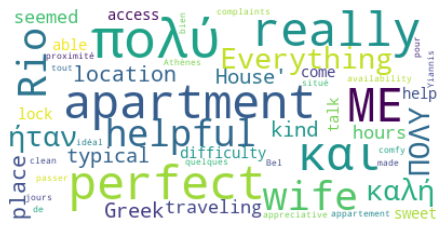

In [25]:
#create word cloud for last_review 
temp_df=df.copy()
# rev_path1 = r'D:\DIT\Python Programs\DataMining\data\april\reviews.csv'
# rev_path2 = r'D:\DIT\Python Programs\DataMining\data\febrouary\reviews.csv'
# rev_path3 = r'D:\DIT\Python Programs\DataMining\data\march\reviews.csv'

rev_path1 = r'C:\Users\pltzi\Desktop\data mining\data\april\reviews.csv'
rev_path2 = r'C:\Users\pltzi\Desktop\data mining\data\febrouary\reviews.csv'
rev_path3 = r'C:\Users\pltzi\Desktop\data mining\data\march\reviews.csv'
 
rev_df1=pd.read_csv(rev_path1)
rev_df2=pd.read_csv(rev_path2)
rev_df3=pd.read_csv(rev_path3)

rev_df = rev_df1.append(rev_df2)
rev_df = rev_df.append(rev_df3)
rev_df.drop_duplicates(inplace=True)
rev_df=rev_df.dropna(axis=0, how="any")
rev_df.to_csv('rev.csv', index=False, header=True)

temp_df=temp_df.rename(columns={'id':'listing_id'})
temp_df=temp_df.rename(columns={'last_review':'date'})
merged=pd.merge(temp_df,rev_df,on=['listing_id','date'])
merged.to_csv('merged.csv', index=False, header=True)

text = merged['comments'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

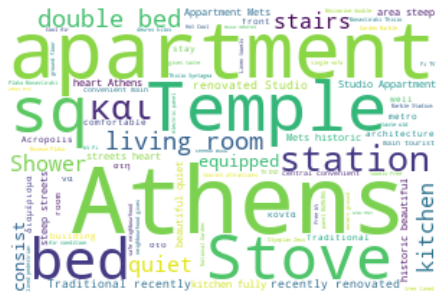

In [26]:
text = df['description'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 300,height = 200, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [27]:
#Question 1.12

Athina: 4413


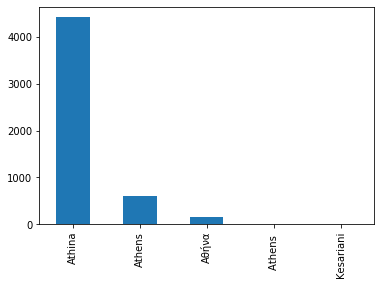

In [28]:
rtypes = new_df['city'].value_counts().index[0]
most_rtype=new_df['city'].value_counts().max()
print(rtypes+": %d" % most_rtype)
new_df['city'].value_counts()[:5].plot.bar();

Real Bed: 5254


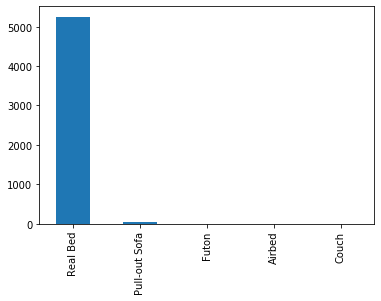

In [29]:
rtypes = new_df['bed_type'].value_counts().index[0]
most_rtype=new_df['bed_type'].value_counts().max()
print(rtypes+": %d" % most_rtype)
new_df['bed_type'].value_counts().plot.bar();

In [30]:
#Question 3

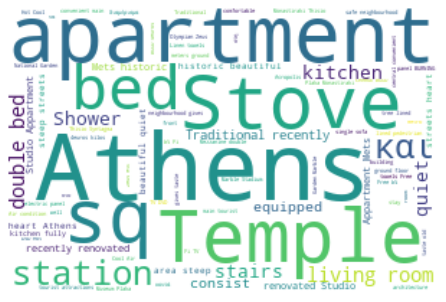

            id                                               name  \
207    1177492                 Trad Studio Appt -  Central Athens   
259    1484797                      Acropolis Apartment brand new   
673    6101639               A private room & the whole house!!!!   
322    2305770                 Acropolis Walk Apartment Brand New   
422    3431705                  2 levels flat in centre of Athens   
...        ...                                                ...   
7883  30391000                     The kiss of Filopappou hill...   
7732  29479991  Unique homm Apartment in Mets, Trivonianou street   
7932  30441615                        Dinostratus House, Studio 8   
8978  31981157          Galatsi_Konstantinos apartment,new house.   
7906  30416134               Hercules Residence -  Ceryneian Hind   

                                            description  \
207   Traditional recently renovated Studio Appartme...   
259   Our deluxe apartment is in Koukaki, the most q.

In [31]:
rec_df = df[['id','name','description']].copy()

text = rec_df['description'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS,width = 300,height = 200, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

rec_df['new_col'] = rec_df[['name','description']].apply(lambda x: ''.join(x), axis=1)
rec_df['new_col'].fillna(value = 'NULL',inplace = True)
# where(pd.notnull(df), None)
rec_df.drop_duplicates(inplace=True,subset='id')
print(rec_df)

In [32]:
#Question 3.1

In [33]:
# stop_words = set(stopwords.words('english')) 

txt1 = rec_df['new_col'].values

vectorizer = TfidfVectorizer(ngram_range = (1, 2),stop_words=STOPWORDS) 
X = vectorizer.fit_transform(txt1)
# print(X.toarray())

C:\Users\pltzi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [34]:
#Question 3.2

In [35]:
cosine_array=cosine_similarity(X)                         #calculate cosine similarity
tup_list=[]
for i in range(len(cosine_array)):                      #save the top 100 similarities along with their array indexes
    for j in range(len(cosine_array)):
        if j!=i:
            tup=(i,j,cosine_array[i][j])
            if len(tup_list)<100:
                tup_list.append(tup)
                tup_list.sort(key=lambda tup: tup[2])
            else :
                temp_tup=tup_list[0]
                if tup[2]>temp_tup[2]:
                    tup_list.pop(0)
                    tup_list.append(tup)
                    tup_list.sort(key=lambda tup: tup[2])


                    
                    
d={}
for tup in tup_list:                                          #find the pairs using the array indexes 
    d1={rec_df["id"].iloc[tup[0]]:rec_df["id"].iloc[tup[1]]}  #and save then in a dictionary
    d.update(d1)
print(d)

{29926293: 30578520, 31560654: 31560802, 29925898: 30578520, 30373912: 30578520, 32650458: 32650034, 31558982: 31560802, 30363275: 30578520, 31560802: 31558982, 29945264: 30578520, 32649434: 32650034, 32650034: 32649434, 30578520: 29945264, 10603975: 27162716, 26497308: 30424563, 30424563: 26497308, 30980510: 30341020, 27162716: 10603975, 30980429: 30341020, 30362269: 30341020, 30906405: 30341020, 30760835: 30341020, 27254673: 30009754, 30089884: 30341020, 30363015: 30341020, 30341020: 30363015, 30009754: 27254673}


In [36]:
#Question 3.3

In [37]:
def recommend(item_id,num):
    row=0
    for id in rec_df["id"]:
        if id == item_id :
            break;
        else:
            row+=1

    tup_list2=[]
    for j in range(len(cosine_array)):
        if j!=row:
            tup=(j,cosine_array[row][j])
            if len(tup_list2)<num:
                tup_list2.append(tup)
                tup_list2.sort(key=lambda tup: tup[1])
            else :
                temp_tup=tup_list2[0]
                if tup[1]>temp_tup[1]:
                    tup_list2.pop(0)
                    tup_list2.append(tup)
                    tup_list2.sort(key=lambda tup: tup[1])


    print("Recommending %d"%num + " listings similar to %d"%item_id)
    print("\n")
    for tup in tup_list2:                                          #find the pairs using the array indexes 
        print("Recommended: %s"%rec_df["name"].iloc[tup[0]])
        print("Description: %s"%rec_df["description"].iloc[tup[0]])
        print("(score: %f)"%tup[1])
        print("\n\n\n")


item_id = input("Please enter an id:\n")
item_id = int(item_id)
num = input("Please enter the amount of recommendations you want:\n")
num=int(num)
recommend(item_id,num)

Please enter an id:
30341020
Please enter the amount of recommendations you want:
2
Recommending 2 listings similar to 30341020


Recommended: Walk to Acropolis & Metro30m-1Bed in FemaleDorm(n)
Description: A modern hostel/apartment complex which offers a unique staying experience right at the heart of Athens . Wake up in our cozy room, and enjoy your breakfast on the traditional balcony in the heart of Historic Athens.Then go upstairs to our unique rooftop and relax while taking in the breathtaking view of the Acropolis ,Lycabettus hill and Technopolis! Clean,contemporary decor and historic elements combine on a quiet street in the charming Athens! A spacious, sunny room found on a modern hostel of an award-winning traditional building right in the heart of Athens in the well known Gazi district,a cultural and arts center which is particulary famous of its excellent choice of cafes,bars and restaurants as well as theatrical stages ! Only steps away from metro station Kerameikos ( whic

In [38]:
#Question 3.4

In [39]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
txt = rec_df['new_col']

bigrams = [b for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]

finder = BigramCollocationFinder.from_words(bigrams,window_size=2)
finder.ngram_fd.items()
temp = finder.nbest(bigram_measures.pmi, 10)
for i in range(len(temp)):
    print('%s'%temp[i][1][0] + ' - %s'%temp[i][1][1])
                                            
                                            
                                            

"PANORMOU" - metro
(1 - QSS
(45m2) - lovely
(4euros/kilos) - The
(60 - μέτρα)
(72sqmtrs - with
(CHECK - IT
(dinning - table
(watch - free
**Smoking - is
